Image file with dimensions 100x100 pixels turned into (100, 100, 3) vectors.


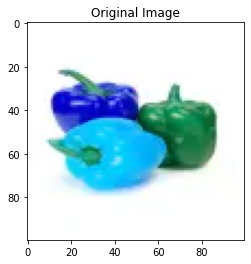

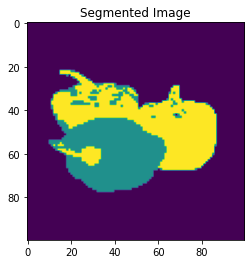

In [2]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import random


def find_cluster_points(centerPoints, vectors):
    distance_mapping = None
    for count, centre_point in enumerate(centerPoints):
        # get distance array
        if distance_mapping is None:

            distance_mapping = np.array([np.sum(abs(vectors - centre_point) ** 2, axis=2)])
        else:
            distance_mapping = np.concatenate(
                (distance_mapping, np.array([np.sum(abs(vectors - centre_point) ** 2, axis=2)])))

    return np.argmin(distance_mapping, axis=0)


def get_new_centerPoints(vectors, cluster_mapping, centerPoints):
    len_centerPoints = len(centerPoints)
    cluster_centroid = {}
    for i in range(len_centerPoints):
        cluster_centroid[i] = []

    row, col = cluster_mapping.shape
    for r in range(row):
        for c in range(col):
            cluster_centroid[cluster_mapping[r][c]].append(vectors[r][c])

    new_centerPoints = []
    for i in range(len_centerPoints):
        temp_arr = np.array(cluster_centroid[i])
        b_centroid = int(np.sum(temp_arr[:, 0]) / len(temp_arr[:, 0]))
        g_centroid = int(np.sum(temp_arr[:, 1]) / len(temp_arr[:, 1]))
        r_centroid = int(np.sum(temp_arr[:, 2]) / len(temp_arr[:, 2]))
        new_centerPoints.append([b_centroid, g_centroid, r_centroid])

    return np.array(new_centerPoints)

    # return list of centroids


def kmeans(vectors: list, kVal: int):
    # choose k initial random unequal points

    centerPoints = np.array([random.choice(random.choice(vectors))], dtype=np.int8)
    while len(centerPoints) != kVal:
        candidate = random.choice(random.choice(vectors))
        if not np.isin(candidate, centerPoints).all():
            centerPoints = np.concatenate((centerPoints.reshape(-1, 3, ), candidate.reshape(1, 3, )))

    while True:
        # get cluster of each pixel
        cluster_mapping = find_cluster_points(centerPoints, vectors)
        # find new clusters
        new_centerPoints = get_new_centerPoints(vectors, cluster_mapping, centerPoints)
        if np.isin(new_centerPoints, centerPoints).all():
            break
        centerPoints = new_centerPoints
    return cluster_mapping


# read image

image_path = "/content/44 (1).webp"
image = cv2.imread(image_path)
w, h, d = image.shape

# Display image in notebook:
# %matplotlib inline

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(w, h, image.shape))

kmeans_clusters = kmeans(image, 3)
# kmeans_clusters
plt.title('Original Image')
plt.imshow(np.asarray(image))
plt.show()

plt.title('Segmented Image')
plt.imshow(np.asarray(kmeans_clusters))
plt.show()


